In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# To run this notebook on Google Colab, uncomment the following section of code.
#from google.colab import drive 
#drive.mount("/content/drive/")
#import os
#os.chdir("/content/drive/My Drive/DSECOP/Exploratory_Data_Analysis/")
#!pwd


# Exploratory Data Analysis

When many people think of conducting experiments, they visualize the scientific process as a well-defined set of steps from initial question to result: 

-> A scientist proposes a hypothesis to test 
  - *I believe that larger objects fall faster than small objects.*

-> The scientist designs an experiment to test this hypothesis 
- *I will throw a large and a small ball from a tower and time how long each one takes to reach the ground.*

-> The scientist carries out the experiment to collect data
- *A 10kg ball takes 20 seconds to reach the ground, and a 5kg ball takes 21 seconds.*

-> The scientist analyzes the data
- *Both of the balls take similar times to reach the ground.*

-> The scientist accepts or rejects the hypothesis, or proposes a path for further study.
- *20 seconds isn't much smaller than 21 seconds, so I should repeat my experiment several times and collect more data before I come to a conclusion.*


<p><a href="https://blogs.bu.edu/ggarber/files/2012/07/droppingballs.gif">
<img src="https://drive.google.com/uc?export=view&id=1T-YMz4ZjuVwwtd6VnzvIvAuH0RmRrerK" alt="drawing" width="300"/>
</a></p>

---

Generally speaking, this scientific process is followed (especially over longer time periods). However, many fields are based around large, multi-year or -decade experiments: researchers in particle physics might have to wait years to receive particle collision data from the LHC, and scientists working in astronomy might see wait times of a decade or more as telescopes accumulate data. 

In such fields, it's very likely for individuals to only take part in a step or two for a given experiment. It's *very* common for early-career scientists (or those in research internships) to just take part in the data analysis stage. This means that they'll be asked to analyze data that they did not personally take. 

In this notebook, we'll simulate the process of getting familiar with a new dataset. This process is called *Exploratory Data Analysis* (EDA).

--- 

## What is Exploratory Data Analysis?

Exploratory Data Analysis (EDA) can be thought of as a "quick-and-dirty" initial investigation of a dataset.

<p><a href="https://datos.gob.es/en/documentacion/practical-introductory-guide-exploratory-data-analysis">
<img src="https://drive.google.com/uc?export=view&id=106ZY0KKP9hsdeFGzXuk9DixrrQQ_XOmw" alt="drawing" width="600"/>
</a></p>

EDA has three main purposes:

1. Check a dataset for obvious errors 
2. Broadly characterize a dataset (such as through calculating summary statistics)
3. Explore features of a dataset in order to guide future, more intense analyses


EDA tends to rely heavily on creating visual tools, such as histograms or scatter plots. It does *not* need to be rigorous -- this means that it shouldn't be too much effort on the part of the data analyzer, and the results of EDA should not be presented as final.

---


## Why is EDA useful?
When given a dataset, it might be tempting to jump right into the analysis! However, it's iportant to run a few sanity checks on the data beforehand, as it can save a *lot* of trouble in the long run. For example, imagine encountering the following issues: 

- You're given a list of user-reported measurements of the length and width of a table, and you want to calculate the surface area of them. But, half of the measurements are in centimeters, and half are in inches.
- Your friend gives you a list of the amount of sunlight that his plant gets per day and asks you to plot it. But, the dates he gives you are in MM/DD/YY format, and you need to somehow plot them on a linear scale. 
- Your professor gives you a list of test subjects in a trial for children's pain reliever and asks you to calculate the mean age of the subjects. But, he accidently handed you a list of test subjects for a completely different study!

Exploratory data analysis can help you diagnose these errors (and more!) before starting a more thorough, time-consuming analysis. 

---

## An EDA simulation: Cleaning particle collider data

Let's carry out a "case study" of sorts to explore the benefits of EDA.

Imagine that you have a friend Bob with his own garage particle collider. Bob has been hard at work colliding muons, and he wants you to analyze the collisions for evidence of a new particle. (Note that Bob is a bit overenthusiastic and scatter-brained: he's only been taking data for about a week, and you're not sure how carefully he's been logging his measurements.)

**Activity:** Load Bob's data from the week (`week_data.csv`) using `pd.read_csv`. Print out the dataset -- you should see that it has six columns. Also print out how many entries are in the dataset.

In [2]:
dataset = pd.read_csv("datasets/week_data.csv")

print(dataset)

print(f"The dataset has {dataset.shape[0]} entries.")

             $E$       $p_x$       $p_y$       $p_z$  charge     timestamp
0     540.546145  -70.542034  531.512126   67.987690     1.0  1.665351e+09
1     690.851120  -94.190988  574.105610  372.563856     1.0  1.665351e+09
2     404.627883   74.767988  230.437922  324.083933    -1.0  1.665351e+09
3     582.146688  111.002974  459.645365  339.430044    -1.0  1.665351e+09
4     742.259291  -74.017827  532.251277  511.949513    -1.0  1.665351e+09
...          ...         ...         ...         ...     ...           ...
7995  605.259387  -29.380620  490.154248  353.867586     0.0  1.665355e+09
7996  423.053424  142.492954  344.131180  200.602687     1.0  1.665355e+09
7997  767.303343   21.136952  604.886154  471.522958     0.0  1.665355e+09
7998  874.618543 -113.936119  545.804686  673.603860     1.0  1.665355e+09
7999  771.396138   66.224818  350.393064  683.962342     0.0  1.665355e+09

[8000 rows x 6 columns]
The dataset has 8000 entries.


The easiest thing we can do to get a sense of what the dataset is like is plot a histogram of each of the six features in the dataset. 

**Activity:** Get acquainted with the dataset! Make a histogram of each feature. Write down one thing that you notice about each feature / histogram. 

*Tip:* To access the names of each column, you can use `labels = dataset.columns`, where `dataset` is the variable that you loaded Bob's data into. 

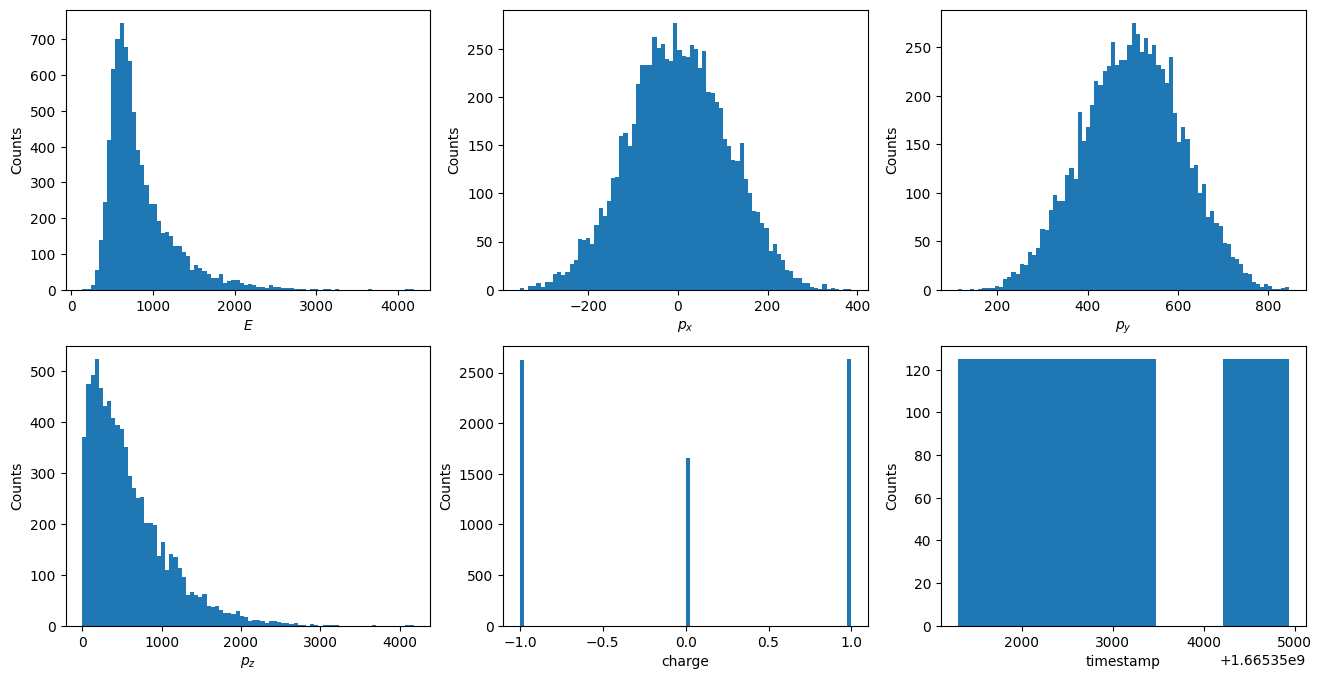

In [3]:
labels = dataset.columns

nbins = 80

fig, axs = plt.subplots(2, 3, figsize = (16, 8))

for i, ax in enumerate(axs.reshape(-1)): 
  ax.hist(dataset[labels[i]], bins = nbins)
  ax.set_xlabel(labels[i])
  ax.set_ylabel("Counts")

plt.show()

*Write your answer here*

Now, if you *didn't* notice anything off about the "timestamp" plot, take another look -- you should see that a large chunk of the data is missing! 

This strikes you as odd, so you go back to Bob and ask him about the missing data. Bob realizes that he forgot to include the data that he took on Monday! He sends you over a new dataset, `monday_data.csv`.

**Activity:** Load Bob's data from Monday. Print out the dataset. Then combine Monday's data with the rest of the week's data into a single variable. Print out the number of entries that the full dataset has.



In [4]:
monday_dataset = pd.read_csv("datasets/monday_data.csv")

full_data = pd.concat([dataset, monday_dataset])

print(f"The full dataset has {full_data.shape[0]} entries.")

The full dataset has 10000 entries.


**Activity:** Once again, make a histogram of each feature. Write down one thing that you notice about each feature / histogram.

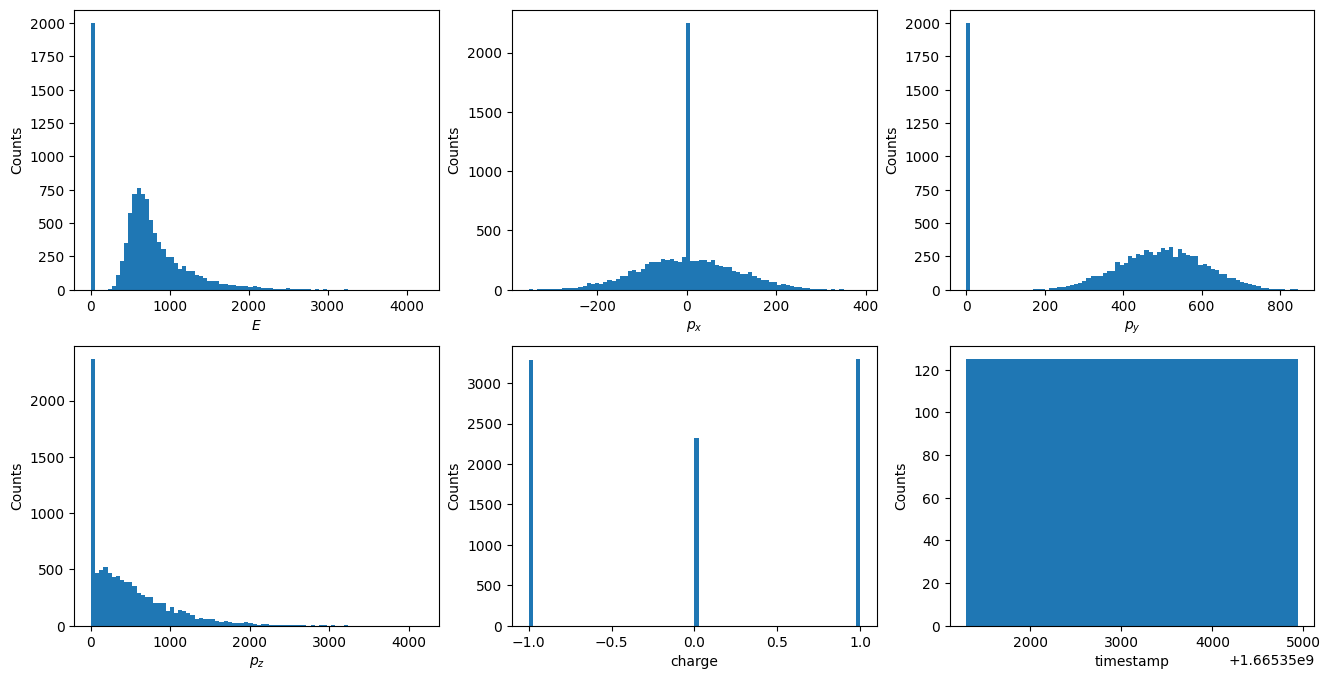

In [5]:
fig, axs = plt.subplots(2, 3, figsize = (16, 8))

for i, ax in enumerate(axs.reshape(-1)): 
  ax.hist(full_data[labels[i]], bins = nbins)
  ax.set_xlabel(labels[i])
  ax.set_ylabel("Counts")

plt.show()


*Write your answer here*

Hopefully, you noticed something off about the momentum data! Let's look into this further...

**Activity:** Make a histogram of each feature. This time, plot histograms for both the first dataset that Bob gave you *and* the full dataset (with Monday's data) on the same axes. 

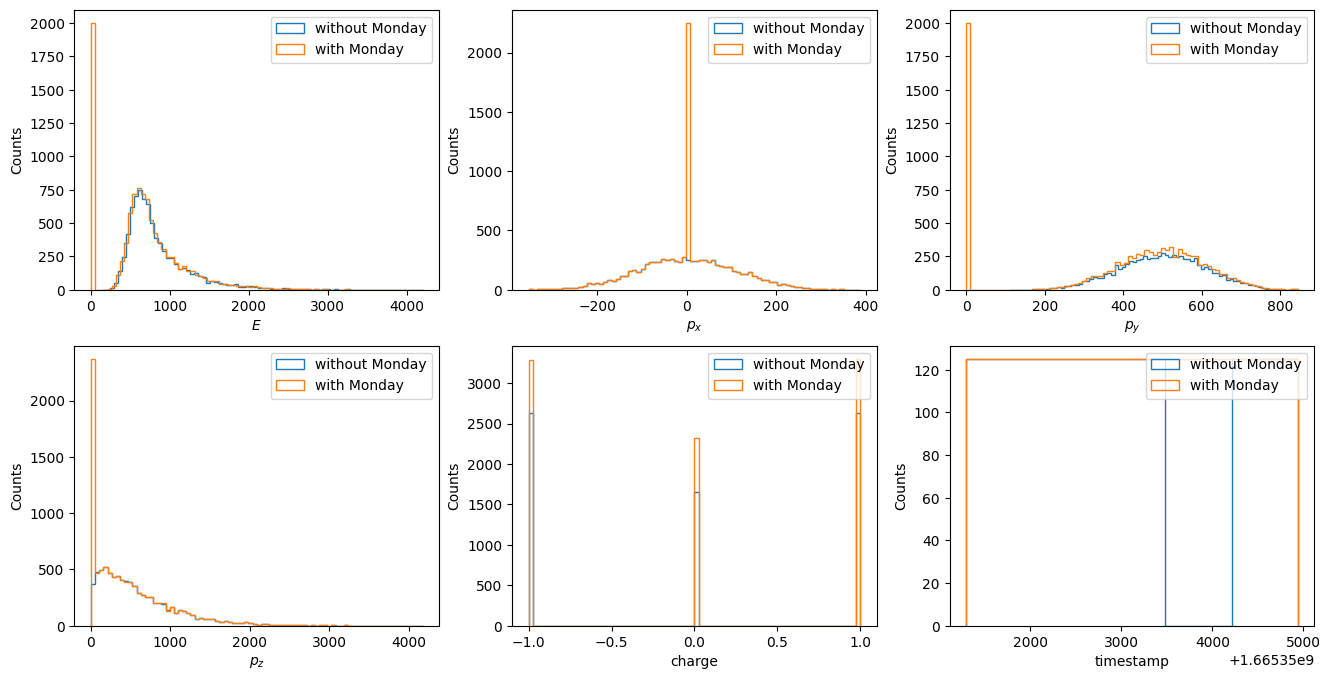

In [6]:
fig, axs = plt.subplots(2, 3, figsize = (16, 8))

for i, ax in enumerate(axs.reshape(-1)): 
  ax.hist(dataset[labels[i]], bins = nbins, label = "without Monday", histtype = "step")
  ax.hist(full_data[labels[i]], bins = nbins, label = "with Monday", histtype = "step")
  ax.set_xlabel(labels[i])
  ax.set_ylabel("Counts")
  ax.legend()

plt.show()


You notice that for Monday's data, the energy and momentum values that Bob provided seem to be a lot smaller than they were on the other days!

You ask Bob about this result (after all, why should particles contain less energy on a Monday?). Bob tells you that he was initially recording his energy and momentum data in units of GeV, on Monday he decided to spice things up and record everything in TeV. 

**Activity:** Convert all of the energy and momentum data from Monday into GeV. (Hint: you'll need to multiply them by 1000). Once again, make a histogram of each feature for the full, unit-corrected dataset.

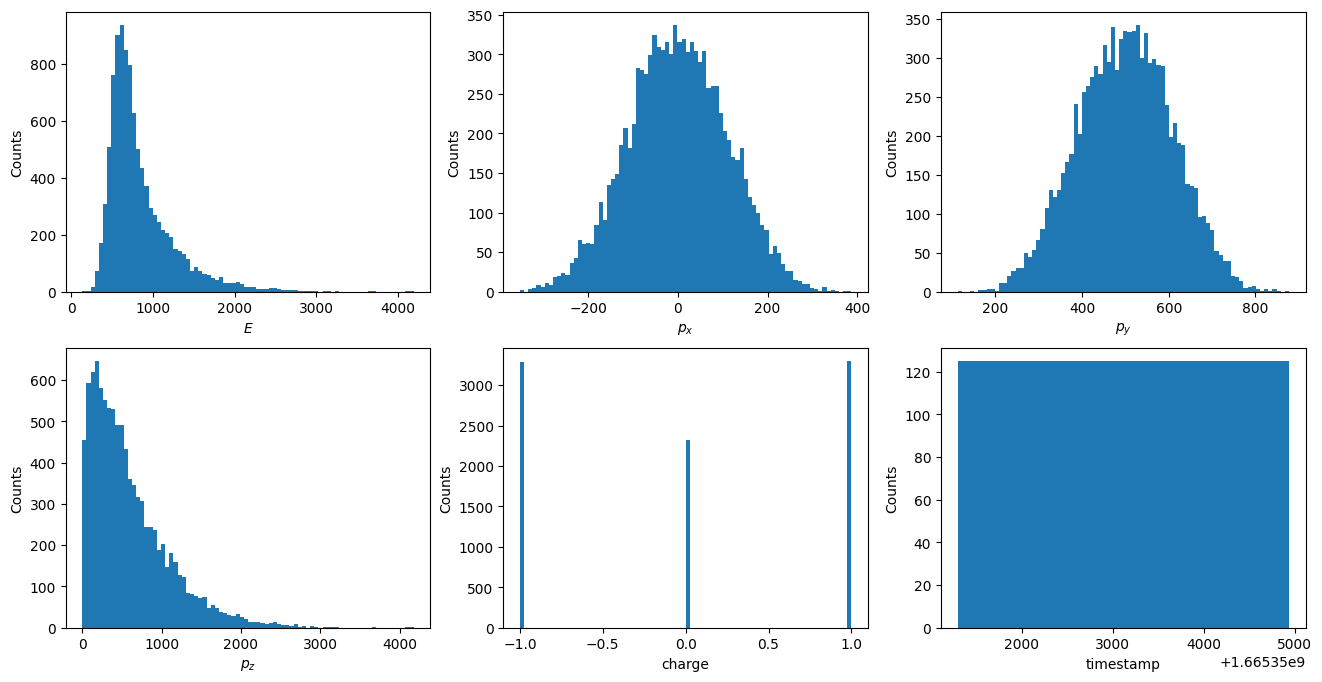

In [7]:
monday_start = np.min(monday_dataset["timestamp"])
monday_end = np.max(monday_dataset["timestamp"])


corrected_full_data = full_data.copy()

monday_mask = (corrected_full_data["timestamp"] >= monday_start) & (corrected_full_data["timestamp"] <= monday_end)

corrected_full_data.loc[monday_mask, "$E$"]*= 1000
corrected_full_data.loc[monday_mask, "$p_x$"]*= 1000
corrected_full_data.loc[monday_mask, "$p_y$"]*= 1000
corrected_full_data.loc[monday_mask, "$p_z$"]*= 1000


fig, axs = plt.subplots(2, 3, figsize = (16, 8))

for i, ax in enumerate(axs.reshape(-1)): 
  ax.hist(corrected_full_data[labels[i]], bins = nbins)
  ax.set_xlabel(labels[i])
  ax.set_ylabel("Counts")

plt.show()


With the problem of the units solved, it seems time to wrap up the EDA and move onto a more thorough analysis. However, you receieve a call from Alice, the technician for Bob's muon collider. Alice informs you that she was checking the wiring of Bob's collider and found a faulty connection in the power source to the electromagnets. As a result, some of the charge data that Bob took may not be accurate.

**Activity:** Calculate and print out the number of positive, negative, and neutral charges in the dataset. Sum them up and calculate how many charge measurements are missing from the dataset. 

In [8]:
charges = corrected_full_data["charge"]

num_positive, num_negative, num_neutral = 0, 0, 0

for c in charges:
  if c > 0:
    num_positive += 1
  elif c == 0:
    num_neutral += 1
  elif c < 0:
    num_negative += 1

num_missing_entries = corrected_full_data.shape[0] - num_positive - num_negative- num_neutral

print(f"The dataset contains {num_positive} positive, {num_negative} negative, and {num_neutral} neutral charges.")
print(f"The dataset is missing {num_missing_entries} charge measurements.")

The dataset contains 3299 positive, 3293 negative, and 2327 neutral charges.
The dataset is missing 1081 charge measurements.


Alice tells you that after further investigation, the detector attached to the muon collider is able to observe charged particles, but not neutral ones. She tells you that you can safely assume that all of the particles without a charge measurement were neutral. 

**Activity:** Update the dataset to account for this new piece of information. Again calculate and print out the number of positive, negative, and neutral charges in the dataset. 

In [9]:
corrected_full_data["charge"] = corrected_full_data["charge"].fillna(0)
charges = corrected_full_data["charge"]

num_positive, num_negative, num_neutral = 0, 0, 0

for c in charges:
  if c > 0:
    num_positive += 1
  elif c == 0:
    num_neutral += 1
  elif c < 0:
    num_negative += 1

num_missing_entries = corrected_full_data.shape[0] - num_positive - num_negative- num_neutral


print(f"The dataset contains {num_positive} positive, {num_negative} negative, and {num_neutral} neutral charges.")
print(f"The dataset is missing {num_missing_entries} charge measurements.")


The dataset contains 3299 positive, 3293 negative, and 3408 neutral charges.
The dataset is missing 0 charge measurements.


At this point, you feel fairly satisfied that Bob's dataset has been sufficiently corrected. However, there are a few more exploratory calculations that you want to do before starting a more rigorous analysis. 

In particle physics, $p_x, p_y, p_z$, and $E$ are generally not the variables of choice. This is because colliders have a preferred orientation corresponding to the *beam axis* (typically $p_z$). As a result, most analyses use the following three variables: 

$$p_T = \sqrt{p_x^2 + p_y^2}$$
$$\phi = \arctan{\frac{p_y}{p_x}}$$
$$\eta = \mathrm{arcsinh}{\frac{p_z}{p_T}}$$

where $p_T$ is the *transverse momentum* with respect to the beam axis, $\phi$ is the *azimuthal scattering angle* with respect to the beam axis, and $y$ is the *pseudorapidity*, which gauges how much momentum a particle has along the beam axis. 

<p>
<img src="https://drive.google.com/uc?export=view&id=1mRggCD7_0wlae6faFJnNBKdl-dQDeUL5" alt="drawing" width="600"/>
</a></p>

**Activity:** Add columns to the dataset for $p_T$, $\phi$, and $\eta$. Plot histograms of each variable and make a comment about each one.

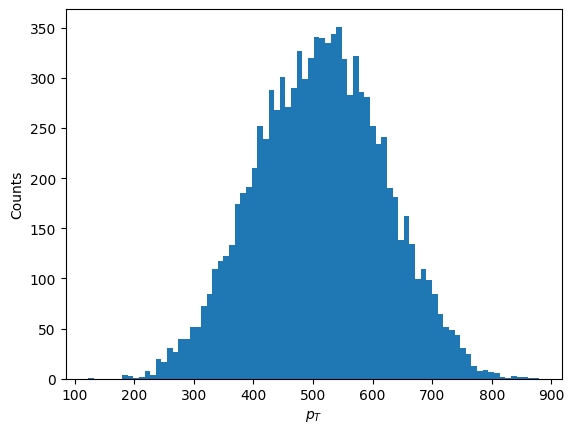

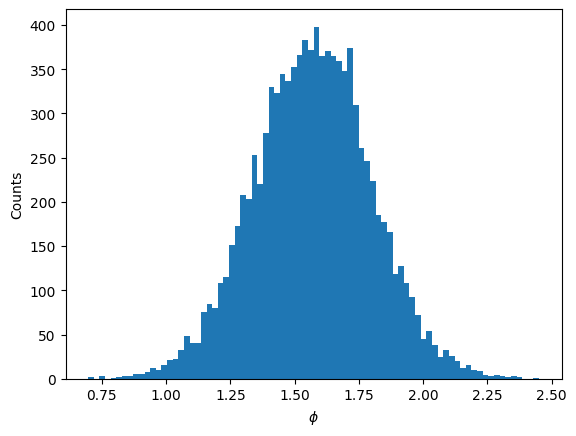

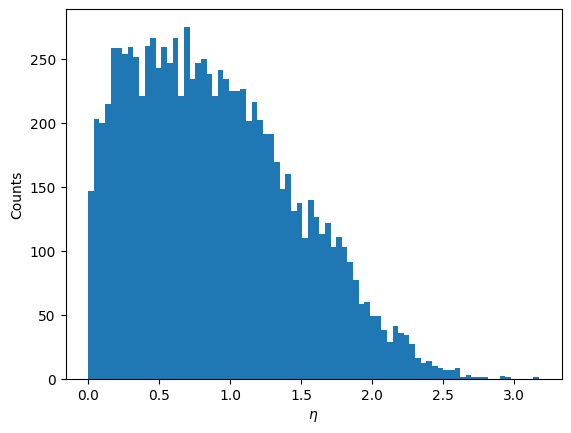

In [10]:
corrected_full_data["pt"] = np.sqrt(corrected_full_data["$p_x$"]**2 + corrected_full_data["$p_y$"]**2)
corrected_full_data["phi"] = np.arctan2(corrected_full_data["$p_y$"], corrected_full_data["$p_x$"])
corrected_full_data["eta"] = np.arcsinh(corrected_full_data["$p_z$"]/corrected_full_data["pt"])

plt.figure()
plt.hist(corrected_full_data["pt"], bins = nbins)
plt.xlabel("$p_T$")
plt.ylabel("Counts")
plt.show()

plt.figure()
plt.hist(corrected_full_data["phi"], bins = nbins)
plt.xlabel("$\phi$")
plt.ylabel("Counts")
plt.show()

plt.figure()
plt.hist(corrected_full_data["eta"], bins = nbins)
plt.xlabel("$\eta$")
plt.ylabel("Counts")
plt.show()



**Activity:** Calculate the print out the mean and standard deviaton of $p_T$, $\phi$, and $\eta$.

In [11]:
pts = corrected_full_data["pt"]
print(f"For $p_T$: mean = {np.mean(pts)}, stand. dev. = {np.std(pts)}")

phis = corrected_full_data["phi"]
print(f"For $\phi$: mean = {np.mean(phis)}, stand. dev. = {np.std(phis)}")

etas = corrected_full_data["eta"]
print(f"For $\eta$: mean = {np.mean(etas)}, stand. dev. = {np.std(etas)}")



For $p_T$: mean = 511.9768995895396, stand. dev. = 107.57997391012083
For $\phi$: mean = 1.5702994844438045, stand. dev. = 0.2271542744228354
For $\eta$: mean = 0.897040363453691, stand. dev. = 0.5665658168403641


You know that the detectors for Bob's muon collider are less reliable when $\eta$ is extreme. Specifically, you likely shouldn't use any data that has $\eta < 2$. 

**Activity:** Create a new dataset that has $\eta < 2$. Histogram the $\eta$ variable, and print out how many entries survived the cut. Finally, save out the dataframe.  

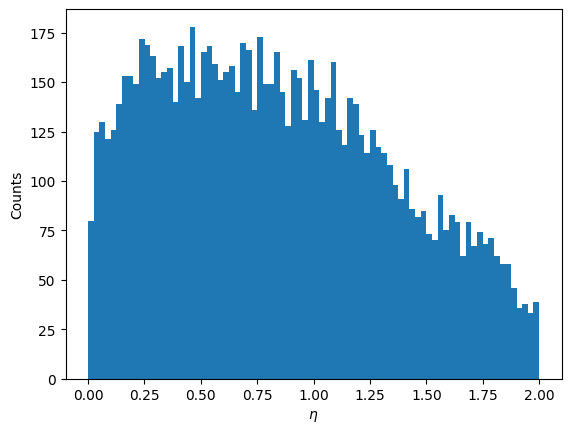

9621 entries remaining (379 cut)


In [12]:
dataset_eta_cut = corrected_full_data[corrected_full_data["eta"] < 2]

plt.figure()
plt.hist(dataset_eta_cut["eta"], bins = nbins)
plt.xlabel("$\eta$")
plt.ylabel("Counts")
plt.show()


print(f"{dataset_eta_cut.shape[0]} entries remaining ({corrected_full_data.shape[0] - dataset_eta_cut.shape[0]} cut)")


In [13]:
dataset_eta_cut.to_csv("dataset_cleaned_eta_cut.csv")

*End of notebook 01*

---